In [3]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
import numpy as np


# 1-A : 
there are noisy records in the dataset and they are shown as circles in the box chart below. these noisy records are then deleted using Z-score as followed : 
> `df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]`




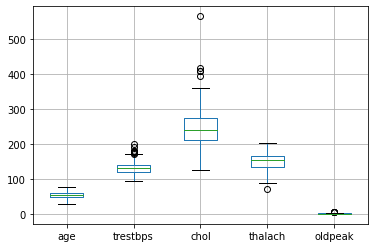

In [4]:
df = pd.read_csv("heart.csv")
boxplot = df.boxplot(column=['age', 'trestbps', 'chol','thalach','oldpeak'])
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

# 1-B:
 data points are not equally distributed in the two target classes and therefore the dataset is not fully balanced. due to this problem, we will not be able to use predictive accuracy as an evaluation method because the model's prediction would be biased towards the class with more data points.


there are 2 common solutions for this issue : 


1.   sampling methods : these methods include **oversampling** and **undersampling**.
oversampling involves generating new data points for the minority class, and undersampling involves removing data points from the majority class
2.   Cost-Sensitive Learning : there are 2 approaches for cost-sensitive learning, Upweighting and Down-weighting. Upweighting is analogous to over-sampling and works by increasing the weight of one of the classes keeping the weight of the other class at one. Down-weighting is analogous to under-sampling and works by decreasing the weight of one of the classes keeping the weight of the other class at one.

In [5]:
print("target 0 : ",df[df.target == 0].shape[0])
print("target 1 : ",df[df.target == 1].shape[0])

target 0 :  129
target 1 :  158


# 2 : 
first, the input and the output are separated, then the corresponding input and output for train and test are derived from the main dataset.

In [6]:
output = df['target']
input = df.drop(['target'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)

# 3 :
In statistics and probability theory, the Bayes’ theorem (also known as the Bayes’ rule) is a mathematical formula used to determine the conditional probability of events. Essentially, the Bayes’ theorem describes the probability of an event based on prior knowledge of the conditions that might be relevant to the event.

P(A|B) =  (P(A).P(B|A)) / P(B)

*   P(A|B) – the probability of event A occurring, given event B has occurred
*   P(B|A) – the probability of event B occurring, given event A has occurred
*   P(A) – the probability of event A
*   P(B) – the probability of event B

## Gaussian Naive Bayes : 
In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution.

## Multinomial Naive Bayes : 
Feature vectors represent the frequencies with which certain events have been generated by a multinomial distribution.

## Bernoulli Naive Bayes : 
In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks.


# 4 : 
the gaussian naive bayes model is defined as a class :

In [7]:
X_train = X_train[['chol','trestbps','thalach']]
X_test = X_test[['chol','trestbps','thalach']]
class GaussianNaiveBayesClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.priors_ = np.bincount(y) / len(y)
        self.n_classes_ = np.max(y) + 1
        
        self.means_ = np.array([X[np.where(y==i)].mean(axis=0) for i in range(self.n_classes_)])
        self.stds_ = np.array([X[np.where(y==i)].std(axis=0) for i in range(self.n_classes_)])
        
        
        return self
    
    def predict_proba(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        res = []
        for i in range(len(X)):
            probas = []
            for j in range(self.n_classes_):
                probas.append((1/np.sqrt(2*np.pi*self.stds_[j]**2)*np.exp(-0.5*((X[i]-self.means_[j])/self.stds_[j])**2)).prod()*self.priors_[j])
            probas = np.array(probas)
            res.append(probas / probas.sum())
            
        
        return np.array(res)
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        res = self.predict_proba(X)
        
        return res.argmax(axis=1)


my_gauss = GaussianNaiveBayesClassifier()
my_gauss.fit(X_train, y_train)


GaussianNaiveBayesClassifier()

# 5 : 
using the model's prediction and the true labels, scores are calculated.

In [8]:
def argmax(p):
  if p[0] > p[1] :
    return 0
  else:
    return 1
predicted = np.zeros(len(y_test))
predicted = [argmax(p) for p in my_gauss.predict_proba(X_test)]

print("F1-score : ",f1_score(y_test, predicted, average='macro'))
print("Precision : ",precision_score(y_test, predicted, average='macro'))
print("Recall : ",recall_score(y_test, predicted, average='macro'))

F1-score :  0.7070707070707072
Precision :  0.7117117117117118
Recall :  0.7043478260869566


# 6 


In [9]:
clf = GaussianNB()
clf.fit(X_train,y_train)
predicted = clf.predict(X_test)

print("F1-score : ",f1_score(y_test, predicted, average='macro'))
print("Precision : ",precision_score(y_test, predicted, average='macro'))
print("Recall : ",recall_score(y_test, predicted, average='macro'))

F1-score :  0.7070707070707072
Precision :  0.7117117117117118
Recall :  0.7043478260869566


# 7
the results of the custom model and the gaussianNB were identical, therefore the scores are also identical

# 8 


In [10]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train,y_train)
predicted = clf.predict(X_test)

print("F1-score : ",f1_score(y_test, predicted, average='macro'))
print("Precision : ",precision_score(y_test, predicted, average='macro'))
print("Recall : ",recall_score(y_test, predicted, average='macro'))

F1-score :  0.6996649406031068
Precision :  0.6983173076923077
Recall :  0.7049689440993789


# 9
the model's scores were better while using the RBF kernel.
using different kernels in SVM models, allow us to add non-linearity to the model's prediction. there is no exact rule on how to choose the right kernel that would apply to all the datasets.

In [11]:
clf_rbf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf'))
clf_rbf.fit(X_train,y_train)
predicted_rbf = clf_rbf.predict(X_test)

print("RBF kernel : ")
print("F1-score : ",f1_score(y_test, predicted_rbf, average='macro'))
print("Precision : ",precision_score(y_test, predicted_rbf, average='macro'))
print("Recall : ",recall_score(y_test, predicted_rbf, average='macro'))


clf_sigmoid = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='sigmoid'))
clf_sigmoid.fit(X_train,y_train)
predicted_sigmoid = clf_sigmoid.predict(X_test)

print("\nSigmoid kernel : ")
print("F1-score : ",f1_score(y_test, predicted_sigmoid, average='macro'))
print("Precision : ",precision_score(y_test, predicted_sigmoid, average='macro'))
print("Recall : ",recall_score(y_test, predicted_sigmoid, average='macro'))

RBF kernel : 
F1-score :  0.6996649406031068
Precision :  0.6983173076923077
Recall :  0.7049689440993789

Sigmoid kernel : 
F1-score :  0.6289978678038379
Precision :  0.6286057692307692
Recall :  0.632919254658385


# 10


In [12]:
output = df['target']
input = df.drop(['target'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train,y_train)
predicted = clf.predict(X_test)

print("F1-score : ",f1_score(y_test, predicted, average='macro'))
print("Precision : ",precision_score(y_test, predicted, average='macro'))
print("Recall : ",recall_score(y_test, predicted, average='macro'))

F1-score :  0.7867647058823529
Precision :  0.7842424242424242
Recall :  0.791304347826087


# 11
we used all datapoints to assess cross validation scores.

In [13]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train,y_train)
scores = cross_val_score(clf, input, output, cv=5)
print(scores)


[0.81034483 0.89655172 0.80701754 0.84210526 0.73684211]


# 12

In [14]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
predicted = neigh.predict(X_test)

print("F1-score : ",f1_score(y_test, predicted, average='macro'))
print("Precision : ",precision_score(y_test, predicted, average='macro'))
print("Recall : ",recall_score(y_test, predicted, average='macro'))

F1-score :  0.6535244922341696
Precision :  0.6630824372759856
Recall :  0.6695652173913043


# 13


# 14
the scores decreased slightly when we used only 3 features.

In [15]:
X_train = X_train[['chol','trestbps','thalach']]
X_test = X_test[['chol','trestbps','thalach']]

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
predicted = neigh.predict(X_test)

print("F1-score : ",f1_score(y_test, predicted, average='macro'))
print("Precision : ",precision_score(y_test, predicted, average='macro'))
print("Recall : ",recall_score(y_test, predicted, average='macro'))


F1-score :  0.6551724137931034
Precision :  0.684472049689441
Recall :  0.684472049689441


# 15
Difference between parametric and nonparametric test is that the parametric test relies on statistical distributions in data whereas nonparametric do not depend on any distribution. Non-parametric does not make any assumptions and measures the central tendency with the median value. 
Nonparametric are valid in a broader range of situations (fewer conditions of validity).
A parametric test is more able to lead to a rejection of H0. Most of the time, the p-value associated to a parametric test will be lower than the p-value associated to a nonparametric equivalent that is run on the same data.


# 16
Matthew’s correlation coefficient is a tool for model evaluation. It measures the differences between actual values and predicted values and is equivalent to the chi-square statistic  for a 2 x 2 contingency table .
Matthew’s correlation coefficient is the best metric for binary classification problems.
  